# **What is F1?**

**Formula 1 (a.k.a. F1 or Formula One) is the highest class of single-seater auto racing sanctioned by the Fédération Internationale de l'Automobile (FIA) and owned by the Formula One Group. The FIA Formula One World Championship has been one of the premier forms of racing around the world since its inaugural season in 1950. The word "formula" in the name refers to the set of rules to which all participants' cars must conform. A Formula One season consists of a series of races, known as Grands Prix, which take place worldwide on purpose-built circuits and on public roads.**

# Importing all the packages that are required

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#  loading required CSV files from the Dataset

In [2]:
results = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/results.csv')
races = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/races.csv')
drivers = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv')
constructors = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/constructors.csv')

# Merging the dataset into one

In [3]:
df = pd.merge(results,races[['raceId','year','name','round']],on = 'raceId',how = 'left')
df = pd.merge(df,drivers[['driverId','driverRef','nationality']],on = 'driverId',how ='left')
df = pd.merge(df,constructors[['constructorId','name','nationality']],on ='constructorId',how ='left')

# Drop the unnecessary columns

In [4]:
df.drop(['number','position','positionText','laps','fastestLap','statusId','resultId','raceId','driverId','constructorId'],axis =1,inplace = True)

# Renaming the columns

In [5]:
df.rename(columns = {'rank':'fastest_lap_rank','name_x':'gp_name','nationality_x':'driver_nationality',
                    'name_y':'constructor_name','nationality_y':'constructor_nationality','driverRef':'driver'},inplace = True)

# Re-arranging the columns

In [6]:
df = df[['year','gp_name','round','driver','constructor_name','grid','positionOrder','points','time',
         'milliseconds','fastest_lap_rank','fastestLapTime','fastestLapSpeed',
        'driver_nationality','constructor_nationality']]

# Drop the season 2019 data because it is incomplete

In [7]:
df= df[df['year']!=2019]

# Sorting the values

In [8]:
df = df.sort_values(by =['year','round','positionOrder'],ascending=[False,True,True])

# Replacing the \n values in time column with NaN because the time column was not registered when driver did not finished the race.

In [9]:
df.time.replace('\\N',np.nan,inplace = True)
df.milliseconds.replace('\\N',np.nan,inplace = True)
df.fastest_lap_rank.replace('\\N',np.nan,inplace = True)
df.fastestLapTime.replace('\\N',np.nan,inplace = True)
df.fastestLapSpeed.replace('\\N',np.nan,inplace = True)

# changing the datatypes of some columns

In [10]:
df.fastestLapSpeed = df.fastestLapSpeed.astype(float)
df.fastest_lap_rank = df.fastest_lap_rank.astype(float)
df.milliseconds = df.milliseconds.astype(float)


# reseting the index

In [11]:
df.reset_index(drop=True, inplace = True)

# checking the shape of database

In [12]:
print(df.shape)

(25420, 15)


# checking the Info

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25420 entries, 0 to 25419
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     25420 non-null  int64  
 1   gp_name                  25420 non-null  object 
 2   round                    25420 non-null  int64  
 3   driver                   25420 non-null  object 
 4   constructor_name         25420 non-null  object 
 5   grid                     25420 non-null  int64  
 6   positionOrder            25420 non-null  int64  
 7   points                   25420 non-null  float64
 8   time                     6892 non-null   object 
 9   milliseconds             6891 non-null   float64
 10  fastest_lap_rank         7171 non-null   float64
 11  fastestLapTime           6963 non-null   object 
 12  fastestLapSpeed          6963 non-null   float64
 13  driver_nationality       25420 non-null  object 
 14  constructor_nationalit

# Checking Head of the database

In [14]:
df.head(10)

,year,gp_name,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
0,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,1:37:33.584,5853584.0,1.0,1:34.570,206.018,Monegasque,Italian
1,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,+5.598,5859182.0,3.0,1:35.740,203.501,Spanish,Italian
2,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,+9.675,5863259.0,5.0,1:36.228,202.469,British,German
3,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,+11.211,5864795.0,6.0,1:36.302,202.313,British,German
4,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,+14.754,5868338.0,8.0,1:36.623,201.641,Danish,American
5,2022,Bahrain Grand Prix,1,bottas,Alfa Romeo,6,6,8.0,+16.119,5869703.0,7.0,1:36.599,201.691,Finnish,Swiss
6,2022,Bahrain Grand Prix,1,ocon,Alpine F1 Team,11,7,6.0,+19.423,5873007.0,14.0,1:37.110,200.630,French,French
7,2022,Bahrain Grand Prix,1,tsunoda,AlphaTauri,16,8,4.0,+20.386,5873970.0,13.0,1:37.104,200.642,Japanese,Italian
8,2022,Bahrain Grand Prix,1,alonso,Alpine F1 Team,8,9,2.0,+22.390,5875974.0,10.0,1:36.733,201.412,Spanish,French
9,2022,Bahrain Grand Prix,1,zhou,Alfa Romeo,15,10,1.0,+23.064,5876648.0,9.0,1:36.685,201.512,Chinese,Swiss


# Set figure size for all the plots

In [15]:
sb.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

# Who are the Top 10 Most GP Winners in F1?

([], [])

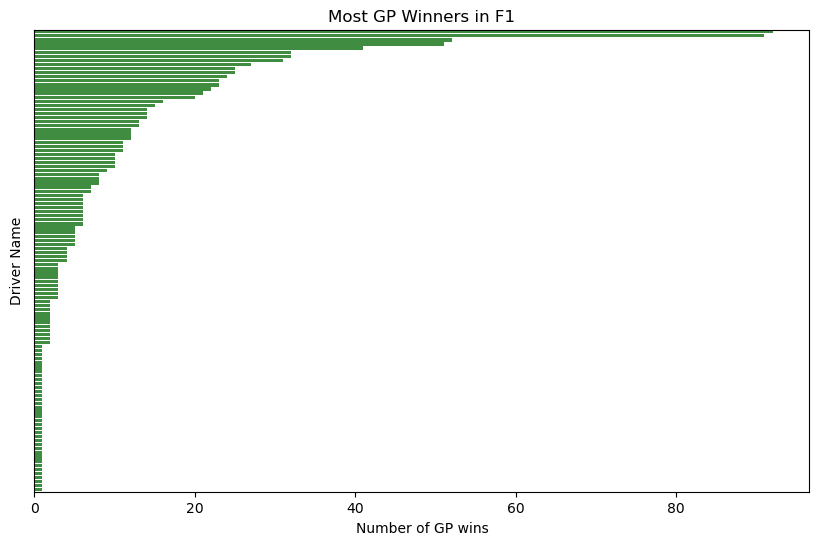

In [16]:
driver_winner = df.loc[df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

#barplot

sb.barplot(data = driver_winner,y='driver',x='positionOrder',color='green',alpha=0.8)
plt.title('Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')
plt.yticks([])

In [17]:
#creating new dataframe of the top 10 gp winners

top10Drivers =driver_winner.head(10)

print(top10Drivers)

               driver  positionOrder
0            hamilton             92
1  michael_schumacher             91
2              vettel             52
3               prost             51
4               senna             41
5              alonso             32
6      max_verstappen             32
7             mansell             31
8             stewart             27
9               clark             25


Text(0.5, 0, 'Number of GP wins')

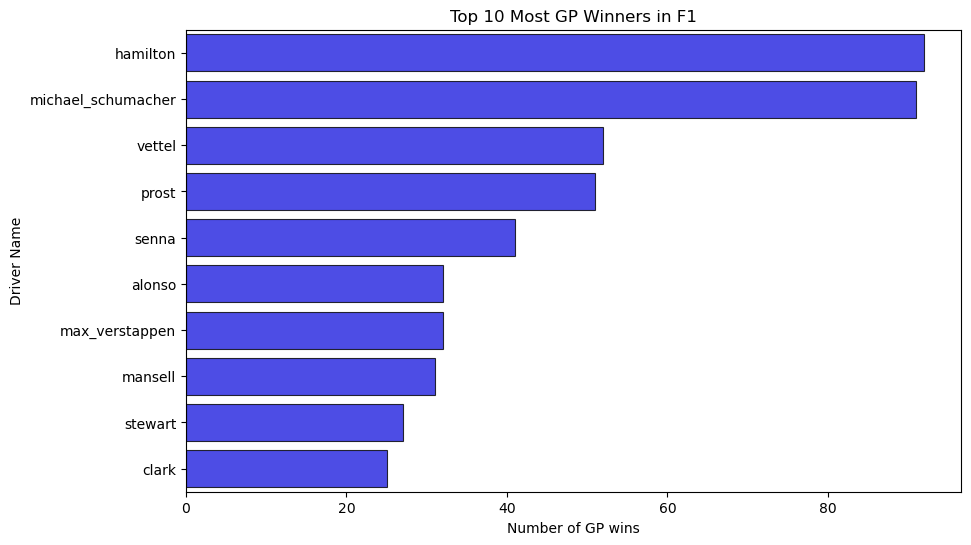

In [18]:
#top 10 drivers plot

sb.barplot(data=top10Drivers,y='driver',x='positionOrder',color='blue',alpha=0.8,linewidth=.8,edgecolor='black')
plt.title('Top 10 Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')


# Who are the Top 10 Most GP wins for constructors?

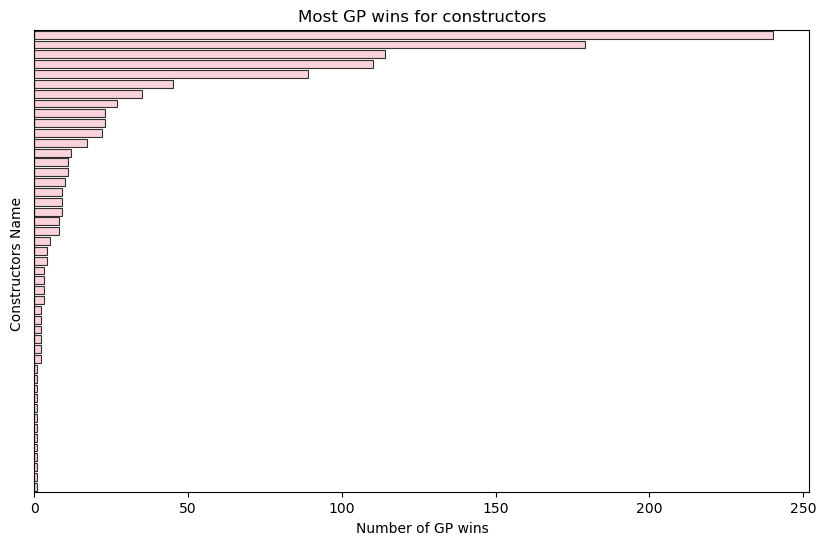

In [19]:
constructor_winner =df.loc[df['positionOrder']== 1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()
                                                             
#barplot
sb.barplot (data = constructor_winner, y = 'constructor_name', x = 'positionOrder',
         color = 'pink', alpha = 0.8, linewidth=.8, edgecolor="black")
plt. title( 'Most GP wins for constructors')
plt.ylabel( 'Constructors Name ')
plt.xlabel('Number of GP wins')
plt.yticks([]);

In [20]:
# top 10 GP constructors winners
top10constructors = constructor_winner.head(10)

 
print(top10constructors)


  constructor_name  positionOrder
0          Ferrari            240
1          McLaren            179
2         Williams            114
3         Mercedes            110
4         Red Bull             89
5       Team Lotus             45
6          Renault             35
7         Benetton             27
8          Brabham             23
9          Tyrrell             23


Text(0.5, 0, 'Number of GP wins')

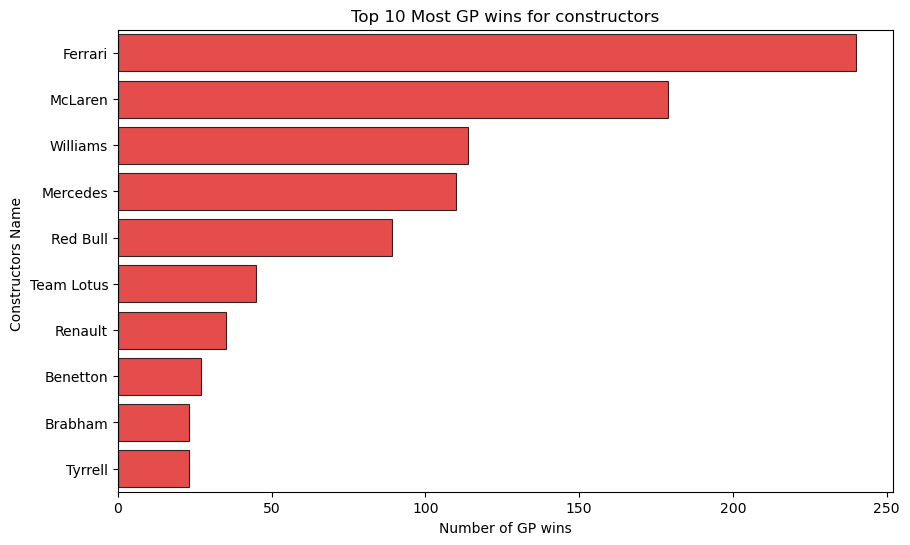

In [21]:
#barplot of top 10 constructors

sb.barplot (data = top10constructors, y = 'constructor_name', x = 'positionOrder',
         color = 'red', alpha = 0.8, linewidth=.8, edgecolor="black")
plt. title( 'Top 10 Most GP wins for constructors')
plt.ylabel( 'Constructors Name ')
plt.xlabel('Number of GP wins')


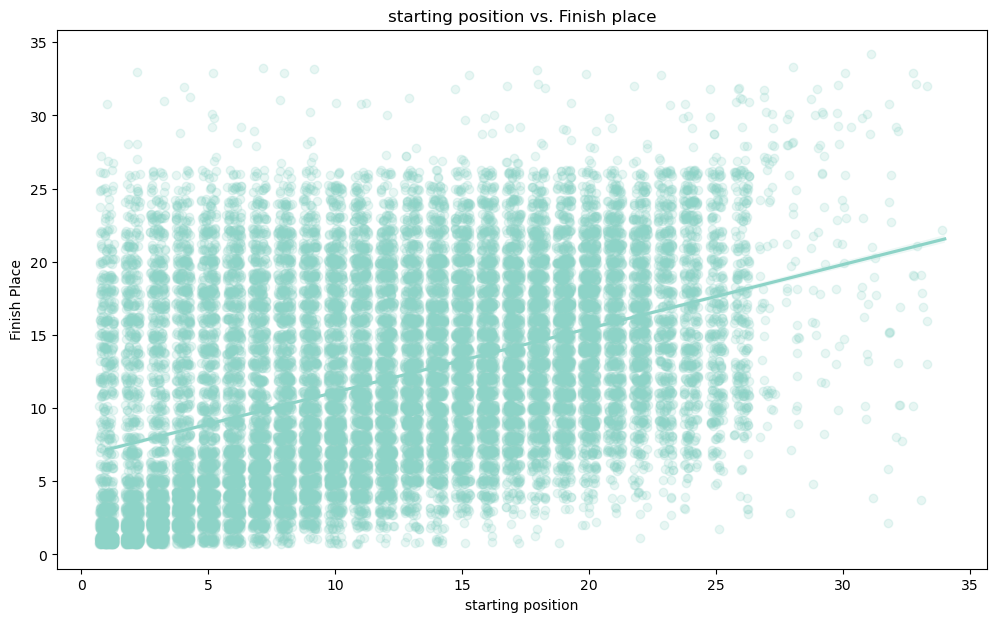

In [22]:
df_no_zero = df[df['grid']!=0]

# create a plot
plt.figure(figsize = [12,7])

sb.regplot(data = df_no_zero, x = 'grid', y = 'positionOrder',x_jitter = 0.3,y_jitter = 0.3, scatter_kws = {'alpha' : 1/5});
plt.title('starting position vs. Finish place')
plt.ylabel('Finish Place')
plt.xlabel('starting position');

# What is the Average speed amongst all teams during the fastest lap at individual GPs?

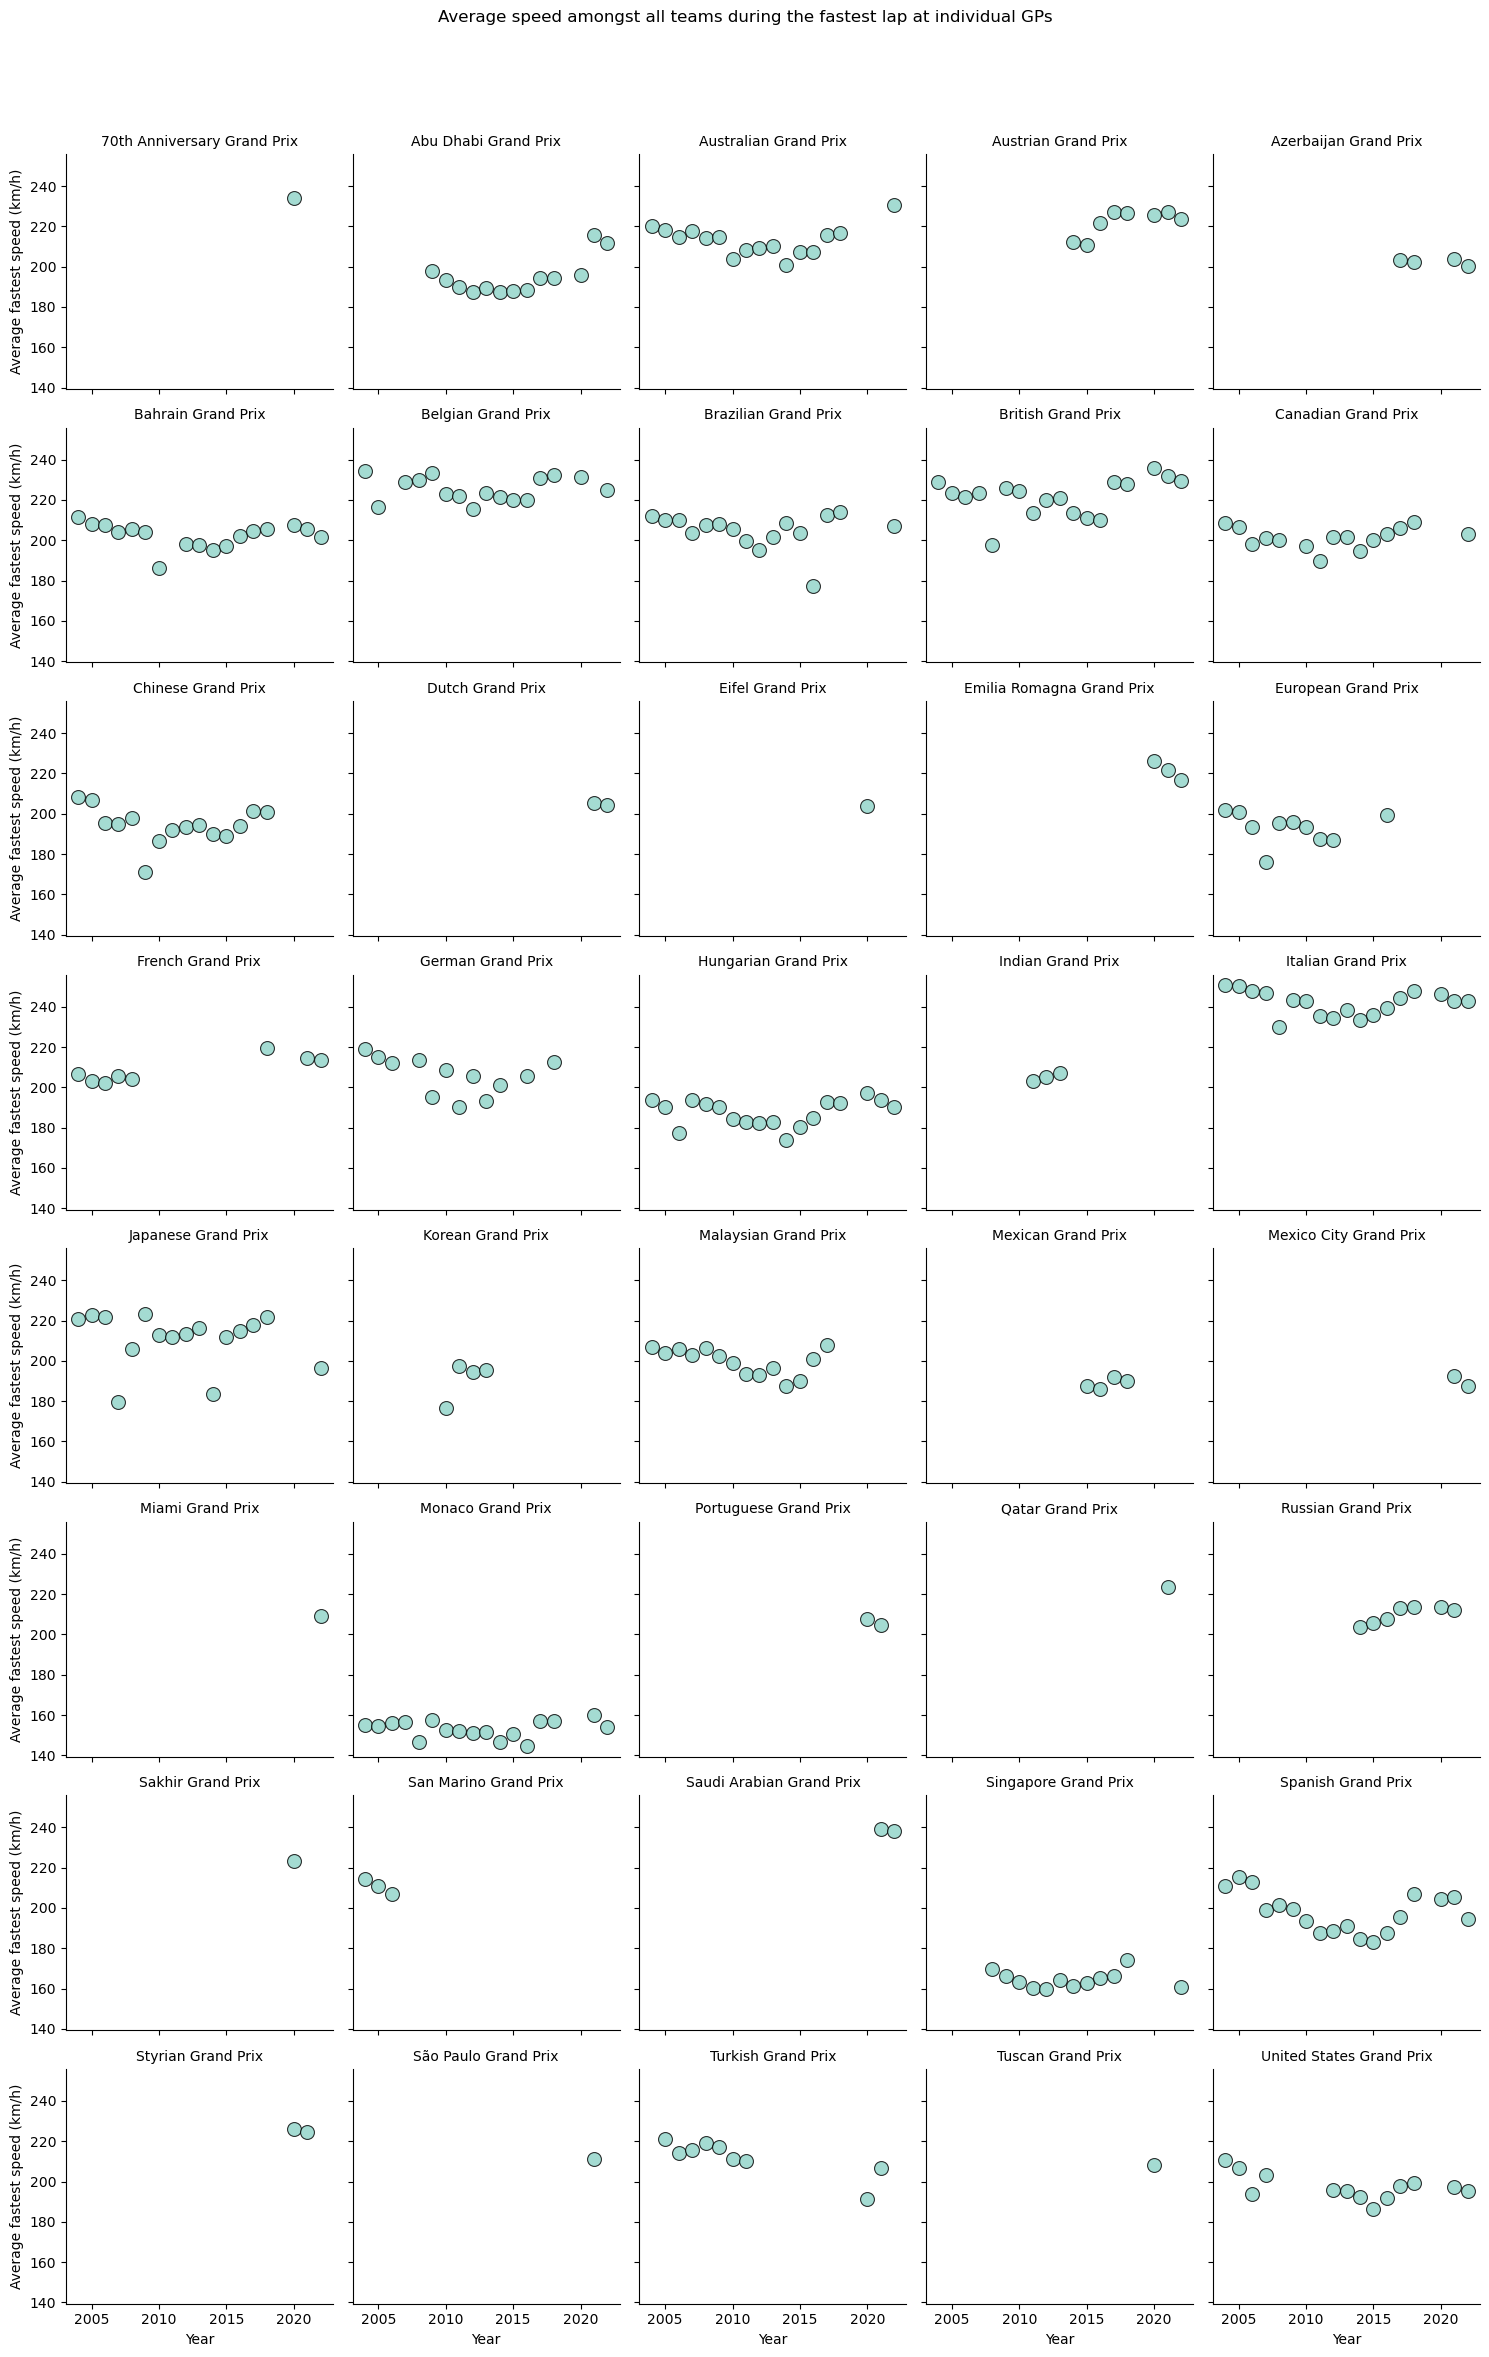

In [23]:
# create new data frame for seasons 2004 onwards
df_speed = df[df['year'] >= 2004]
df_group_speed = df_speed.groupby(['gp_name','year'])['fastestLapSpeed'].mean().to_frame().reset_index()

# create a facetgrid
g = sb.FacetGrid(data = df_group_speed, col ='gp_name',
                    col_wrap=5)
g.map(plt.scatter,'year','fastestLapSpeed',alpha = 0.8, linewidth=.8, edgecolor="black", s = 100 )
g.set_titles("{col_name}")
g.set_xlabels('Year')
g.set_ylabels('Average fastest speed (km/h)')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average speed amongst all teams during the fastest lap at individual GPs');